In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [2]:
import addict
import copy
import datetime
import json
import meshio
import os
import warnings
import scipy
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from pprint import pprint
from ismember import ismember
import matplotlib
import skies


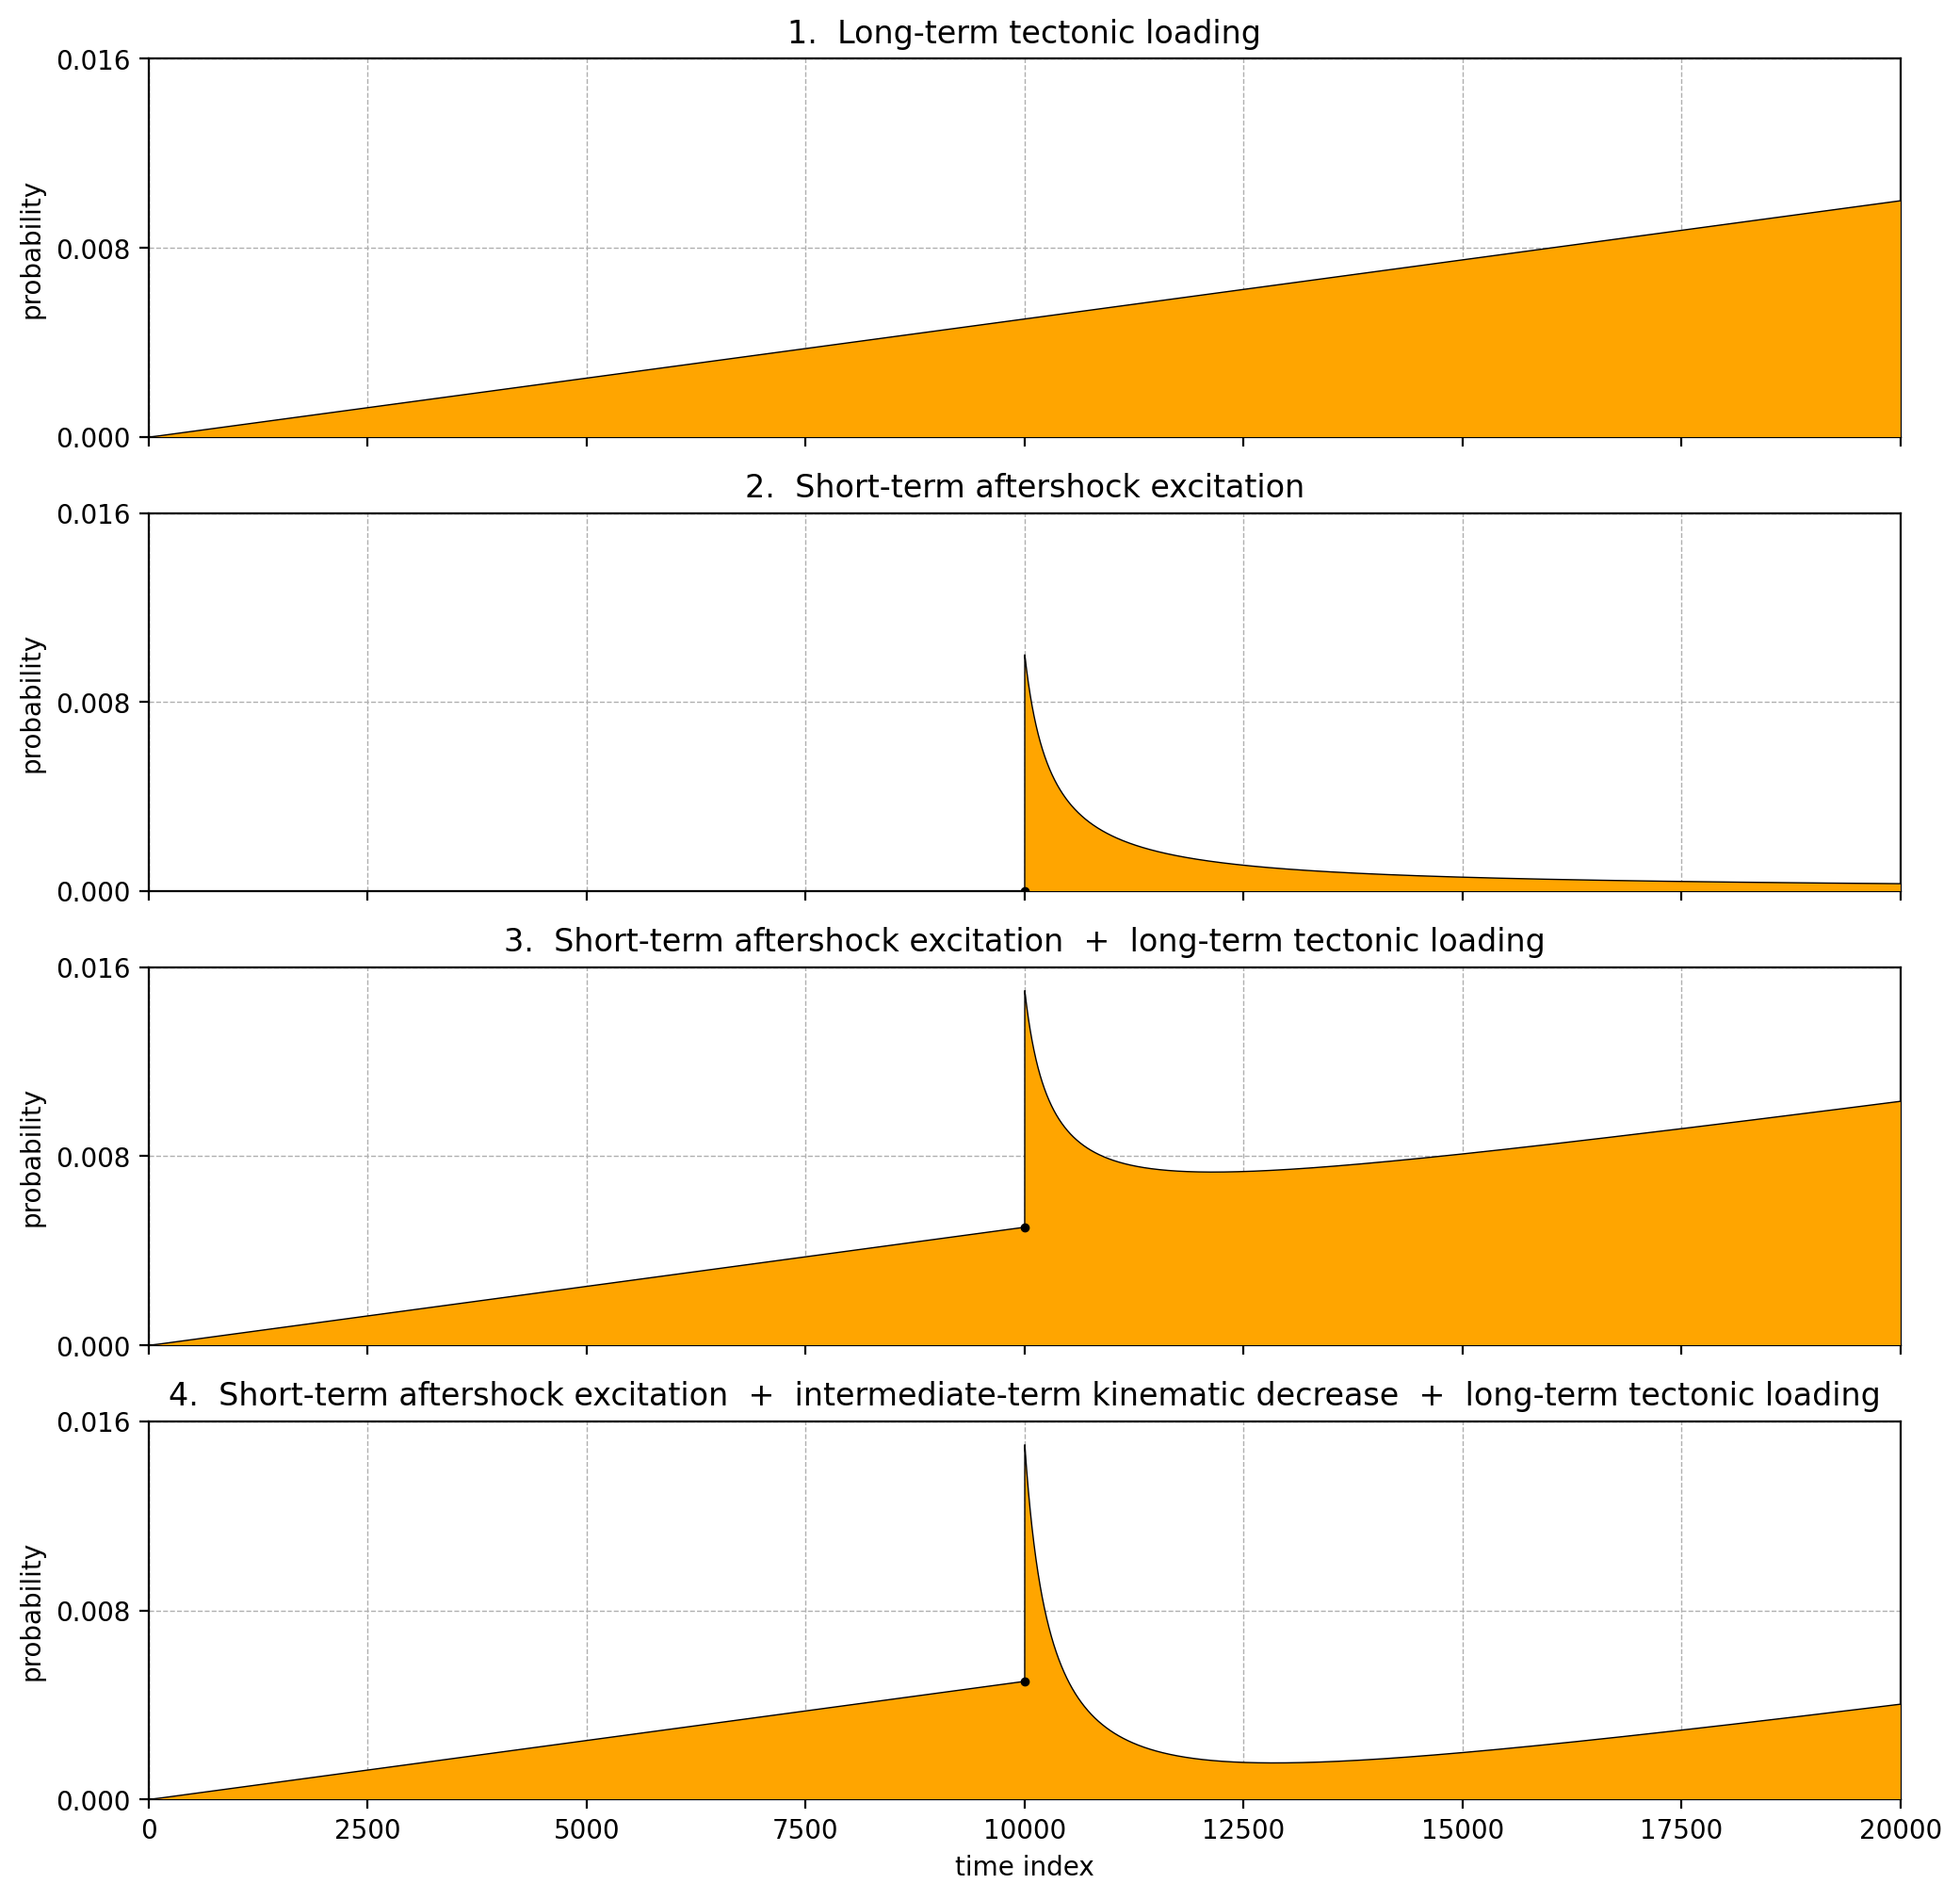

In [7]:
FONTSIZE = 12

moment_magnitude = 8.0

# 1D time series experiment
np.random.seed(0)

def get_omori_decay_probability(time_vector, time_of_earthquake, amplitude, decay_time):
    omori_decay_probability = amplitude / (
        1 + (1 / decay_time) * (time_vector - time_of_earthquake)
    )

    omori_decay_probability[time_vector < time_of_earthquake] = 0.0
    return omori_decay_probability


MM2M = 1e-3  # millimeters to meters
SECONDS_IN_A_YEAR = 60 * 60 * 24 * 365
DAYS_IN_A_YEAR = 365
n_years = 20000
time_vector = np.linspace(0, n_years, n_years * 1)
minimum_probability = 1e-6

plt.figure(figsize=(12, 12))
time_probability = np.zeros_like(time_vector)
time_probability = minimum_probability * np.ones_like(time_vector)
earthquake_index_list = []
earthquake_magnitude_list = []
earthquake_probability_list = []
amplitude = 0.01
for i in range(0, len(time_vector) - 1):
    time_probability_step = 0.000001
    time_probability_step = 0.000000

    event_trigger = 0
    if i == 10000:
        event_trigger = 1
    if event_trigger == 1:
        earthquake_magnitude_list.append(8.0)
        earthquake_index_list.append(i)
        earthquake_probability_list.append(
            get_omori_decay_probability(
                time_vector, time_vector[i], amplitude, decay_time=300.0
            )
        )
        time_probability[i + 1] = (
            time_probability[i] + time_probability_step + amplitude
        )
    else:
        time_probability[i + 1] = time_probability[i] + time_probability_step

        for j in range(len(earthquake_index_list)):
            time_probability[i + 1] += 1.0 * (
                earthquake_probability_list[j][i + 1]
                - earthquake_probability_list[j][i]
            )

    # Catch probabilities less than zero
    if time_probability[i + 1] < minimum_probability:
        time_probability[i + 1] = minimum_probability

    # Catch probabilities greater than one
    if time_probability[i + 1] >= 1.0:
        break

# Non-log plot
plt.subplot(4, 1, 2)
plt.plot(time_vector, time_probability, "-k", linewidth=0.5, zorder=15)
for i in range(len(earthquake_index_list)):
    plt.plot(
        time_vector[earthquake_index_list[i]],
        time_probability[earthquake_index_list[i]],
        ".k",
        markersize=5,
        linewidth=0.0,
        zorder=11,
    )
plt.fill(
    np.append(time_vector, [np.max(time_vector), 0]),
    np.append(time_probability, [np.min(time_probability), minimum_probability]),
    color="orange",
    alpha=1.0,
    edgecolor=None,
    zorder=10,
)
plt.ylabel("probability")
plt.xlim([np.min(time_vector), np.max(time_vector)])
plt.ylim([0, 0.016])
plt.yticks([0, 0.008, 0.016])
plt.grid(True, linewidth=0.5, linestyle="--")
plt.gca().tick_params(axis='x',label1On=False)
plt.title("2.  Short-term aftershock excitation", fontsize=FONTSIZE)





# constant loading plot
plt.subplot(4, 1, 1)
time_probability = np.zeros_like(time_vector)
time_probability = minimum_probability * np.ones_like(time_vector)
earthquake_index_list = []
earthquake_magnitude_list = []
earthquake_probability_list = []
amplitude = 0.01
for i in range(0, len(time_vector) - 1):
    time_probability_step = 0.0000005
    event_trigger = 0
    # if i == 10000:
    #     event_trigger = 1
    if event_trigger == 1:
        earthquake_magnitude_list.append(moment_magnitude)
        earthquake_index_list.append(i)
        earthquake_probability_list.append(
            get_omori_decay_probability(
                time_vector, time_vector[i], amplitude, decay_time=300.0
            )
        )
        time_probability[i + 1] = (
            time_probability[i] + time_probability_step + amplitude
        )
    else:
        time_probability[i + 1] = time_probability[i] + time_probability_step

        for j in range(len(earthquake_index_list)):
            time_probability[i + 1] += 1.0 * (
                earthquake_probability_list[j][i + 1]
                - earthquake_probability_list[j][i]
            )

    # Catch probabilities less than zero
    if time_probability[i + 1] < minimum_probability:
        time_probability[i + 1] = minimum_probability

    # Catch probabilities greater than one
    if time_probability[i + 1] >= 1.0:
        break

# Non-log plot
plt.plot(time_vector, time_probability, "-k", linewidth=0.5, zorder=15)
for i in range(len(earthquake_index_list)):
    plt.plot(
        time_vector[earthquake_index_list[i]],
        time_probability[earthquake_index_list[i]],
        ".k",
        markersize=5,
        linewidth=0.0,
        zorder=11,
    )
plt.fill(
    np.append(time_vector, [np.max(time_vector), 0]),
    np.append(time_probability, [np.min(time_probability), minimum_probability]),
    color="orange",
    alpha=1.0,
    edgecolor=None,
    zorder=10,
)
plt.ylabel("probability")
plt.xlim([np.min(time_vector), np.max(time_vector)])
plt.ylim([0, 0.016])
plt.yticks([0, 0.008, 0.016])
plt.grid(True, linewidth=0.5, linestyle="--")
plt.gca().tick_params(axis='x',label1On=False)
plt.title("1.  Long-term tectonic loading", fontsize=FONTSIZE)







# Tectonic loading + Omori plot
plt.subplot(4, 1, 3)
time_probability = np.zeros_like(time_vector)
time_probability = minimum_probability * np.ones_like(time_vector)
earthquake_index_list = []
earthquake_magnitude_list = []
earthquake_probability_list = []
amplitude = 0.01
for i in range(0, len(time_vector) - 1):
    time_probability_step = 0.0000005
    event_trigger = 0
    if i == 10000:
        event_trigger = 1
    if event_trigger == 1:
        earthquake_magnitude_list.append(moment_magnitude)
        earthquake_index_list.append(i)
        earthquake_probability_list.append(
            get_omori_decay_probability(
                time_vector, time_vector[i], amplitude, decay_time=300.0
            )
        )
        time_probability[i + 1] = (
            time_probability[i] + time_probability_step + amplitude
        )
    else:
        time_probability[i + 1] = time_probability[i] + time_probability_step

        for j in range(len(earthquake_index_list)):
            time_probability[i + 1] += 1.0 * (
                earthquake_probability_list[j][i + 1]
                - earthquake_probability_list[j][i]
            )

    # Catch probabilities less than zero
    if time_probability[i + 1] < minimum_probability:
        time_probability[i + 1] = minimum_probability

    # Catch probabilities greater than one
    if time_probability[i + 1] >= 1.0:
        break

# Non-log plot
plt.plot(time_vector, time_probability, "-k", linewidth=0.5, zorder=15)
for i in range(len(earthquake_index_list)):
    plt.plot(
        time_vector[earthquake_index_list[i]],
        time_probability[earthquake_index_list[i]],
        ".k",
        markersize=5,
        linewidth=0.0,
        zorder=11,
    )
plt.fill(
    np.append(time_vector, [np.max(time_vector), 0]),
    np.append(time_probability, [np.min(time_probability), minimum_probability]),
    color="orange",
    alpha=1.0,
    edgecolor=None,
    zorder=10,
)
plt.ylabel("probability")
plt.xlim([np.min(time_vector), np.max(time_vector)])
plt.ylim([0, 0.016])
plt.yticks([0, 0.008, 0.016])
plt.grid(True, linewidth=0.5, linestyle="--")
plt.gca().tick_params(axis='x',label1On=False)
plt.title("3.  Short-term aftershock excitation  +  long-term tectonic loading", fontsize=FONTSIZE)

# SKIES style figure
plt.subplot(4, 1, 4)

time_probability = np.zeros_like(time_vector)
time_probability = minimum_probability * np.ones_like(time_vector)
earthquake_index_list = []
earthquake_magnitude_list = []
earthquake_probability_list = []
amplitude = 0.01
for i in range(0, len(time_vector) - 1):
    time_probability_step = 0.0000005
    event_trigger = 0
    if i == 10000:
        event_trigger = 1
    if event_trigger == 1:
        earthquake_magnitude_list.append(moment_magnitude)
        earthquake_index_list.append(i)
        earthquake_probability_list.append(
            get_omori_decay_probability(
                time_vector, time_vector[i], amplitude, decay_time=300.0
            )
        )
        time_probability[i + 1] = (
            time_probability[i] + time_probability_step + amplitude
        )
    else:
        time_probability[i + 1] = time_probability[i] + time_probability_step

        for j in range(len(earthquake_index_list)):
            time_probability[i + 1] += 1.65 * (
                earthquake_probability_list[j][i + 1]
                - earthquake_probability_list[j][i]
            )

    # Catch probabilities less than zero
    if time_probability[i + 1] < minimum_probability:
        time_probability[i + 1] = minimum_probability

    # Catch probabilities greater than one
    if time_probability[i + 1] >= 1.0:
        break

plt.plot(time_vector, time_probability, "-k", linewidth=0.50, zorder=15)
for i in range(len(earthquake_index_list)):
    plt.plot(
        time_vector[earthquake_index_list[i]],
        time_probability[earthquake_index_list[i]],
        ".k",
        markersize=5,
        linewidth=0.0,
        zorder=11,
    )
plt.fill(
    np.append(time_vector, [np.max(time_vector), 0]),
    np.append(time_probability, [np.min(time_probability), minimum_probability]),
    color="orange",
    alpha=1.0,
    edgecolor=None,
    zorder=10,
)
plt.xlabel("time index")
plt.ylabel("probability")
plt.xlim([np.min(time_vector), np.max(time_vector)])
plt.ylim([0, 0.016])
plt.yticks([0, 0.008, 0.016])
plt.grid(True, linewidth=0.5, linestyle="--")
plt.title("4.  Short-term aftershock excitation  +  intermediate-term kinematic decrease  +  long-term tectonic loading", fontsize=FONTSIZE)
plt.savefig("elements_of_probability_time_series.pdf")
plt.savefig("elements_of_probability_time_series.png", dpi=500)
plt.show()
